In [183]:
# LOD determination for LC-ICPMS method 

from matplotlib.backends.backend_pdf import PdfPages

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import os
from tempfile import tempdir
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path
import matplotlib.pyplot as plt
from copy import copy 


dir = '/Users/christiandewey/Library/CloudStorage/GoogleDrive-christian.w.dewey@gmail.com/My Drive/manuscripts/dewey-boiteau_LC-ICPMS/LOD/BIOZEN/grouped'

flist=os.listdir(dir)
os.chdir(dir)

print(flist)

['cwd_220505_18_zdv_100ppb_50uL.csv', 'cwd_220505_19_zdv_100ppb_50uL.csv', 'cwd_220505_5_zdv_nitric_50uL.csv', '.DS_Store', 'cwd_220505_4_zdv_nitric_50uL.csv', 'cwd_220505_13_zdv_50ppb_50uL.csv', 'cwd_220505_6_zdv_nitric_50uL.csv', 'cwd_220505_10_zdv_25ppb_50uL.csv', 'cwd_220505_9_zdv_25ppb_50uL.csv', 'cwd_220505_15_zdv_50ppb_50uL.csv', 'cwd_220505_17_zdv_100ppb_50uL.csv', 'cwd_220505_16_zdv_50ppb_50uL.csv', 'cwd_220505_7_zdv_25ppb_50uL.csv', 'cwd_220505_22_zdv_200ppb_50uL.csv', 'cwd_220505_23_zdv_200ppb_50uL.csv', 'cwd_220505_25_zdv_200ppb_50uL.csv', 'cwd_220505_24_zdv_200ppb_50uL.csv', 'cwd_220505_14_zdv_50ppb_50uL.csv', 'cwd_220505_8_zdv_25ppb_50uL.csv', 'cwd_220505_20_zdv_100ppb_50uL.csv', 'cwd_220505_21_zdv_100ppb_50uL.csv', 'cwd_220505_26_zdv_200ppb_50uL.csv', 'cwd_220505_11_zdv_25ppb_50uL.csv', 'cwd_220505_12_zdv_50ppb_50uL.csv']


In [216]:

def getPeakArea(df):

    cnames = df.columns.values.tolist()

    metal = cnames[1]

    t = cnames[0]

    summed_area = 0
    timeDelta = 0
    totalTime = 0
    me_col_ind = 1 # = df.columns.get_loc(metal)
    for i in range(len(df)-1):

        icp_1 = df.iloc[i,me_col_ind] # cps
        icp_2 = df.iloc[i+1,me_col_ind] 
        min_height = min([icp_1,icp_2])
        max_height = max([icp_1,icp_2])
        
        timeDelta = (df.iloc[i+1,me_col_ind - 1] - df.iloc[i,me_col_ind - 1]) # minutes; time is always to left of metal signal

        
        rect_area = timeDelta * min_height
        top_area = timeDelta * (max_height - min_height) * 0.5
        An = rect_area + top_area

        summed_area = summed_area + An  # area =  cps * sec = counts
        totalTime = totalTime + timeDelta
    return summed_area

55Mn
Root mean squared error: 33.48
3 X RMSE: 100.43
(array([  0,   5,  17,  20,  33,  40,  43,  67,  79,  96, 106, 111, 120,
       126, 138, 149]),)
(1, 16)
257.074402084444


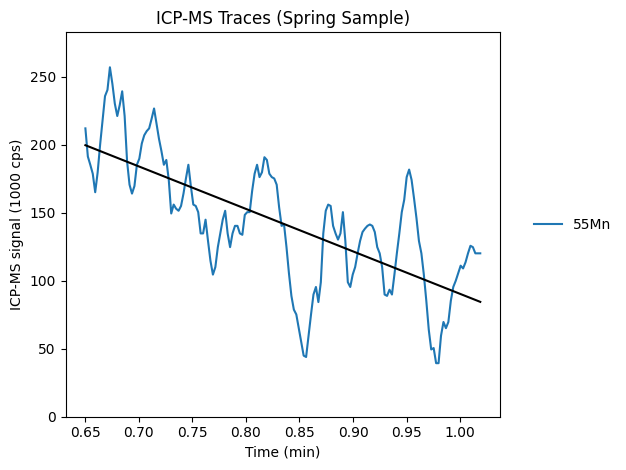

In [172]:
metals = ['55Mn', '59Co','60Ni','66Zn','111Cd','63Cu', '56Fe']
metals = ['55Mn']

flist = ['cwd_220505_23_zdv_200ppb_50uL.csv']

for f in flist:
    fig, ax = plt.subplots()
    df = pd.read_csv(f,sep=';',header=1)


    maxicp = 0 
    for me in metals:

        me_key = 'Time %s' %me

        x = df[me_key]/60
        
        inds = np.asarray(x>=0.65)
        x_sub = x[inds]

        y = df[me]
        
        y_sub = y[inds]
            
        x_sub = np.asarray(x_sub).reshape((-1, 1))

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(x_sub, y_sub)

        # Make predictions using the testing set
        pred = regr.predict(x_sub)
        rmse=np.sqrt(mean_squared_error(y_sub, pred))
        # The mean squared error
        print(me)
        print("Root mean squared error: %.2f" % rmse)
        # The coefficient of determination: 1 is perfect prediction
        print("3 X RMSE: %.2f" % (3*rmse))


        z = y_sub - pred
        dx = x_sub[1:] - x_sub[:-1]

        z = np.array(z)

        cross = np.sign(np.multiply(z[:-1], z[1:]))

        indx = np.where(cross==-1)
        print(indx)

        print(np.shape(indx))
        x_intersect = x_sub[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]


        #ax.plot(icpms[me_key]/60, icpms[me]/1000, label=me)        
        ax.plot(x_sub, y_sub, label=me) 
        ax.plot(x_sub,pred,color='black')       
        maxicp = max(maxicp,max(y_sub))

    print(maxicp)
    ax.set_ylim(0,maxicp*1.1)
    ax.set_title('ICP-MS Traces (Spring Sample)')
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('ICP-MS signal (1000 cps)')
    ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
    #ax.set_xlim(13.5,16.5)
    #ax.set_ylim(0,0.1e4)
    fig.tight_layout()
    plt.show()


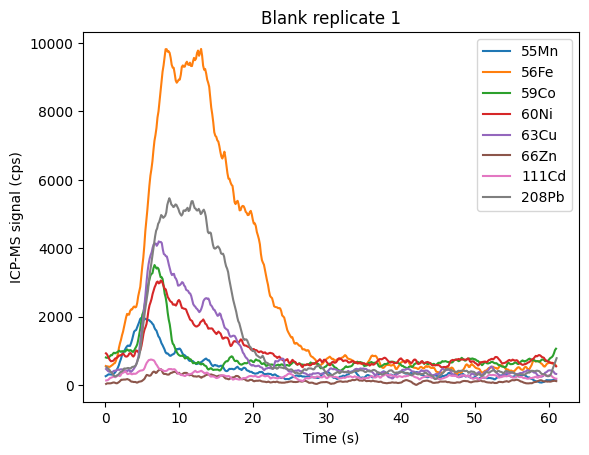

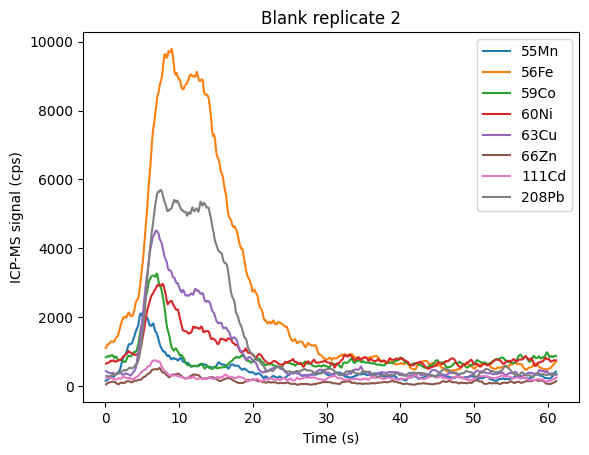

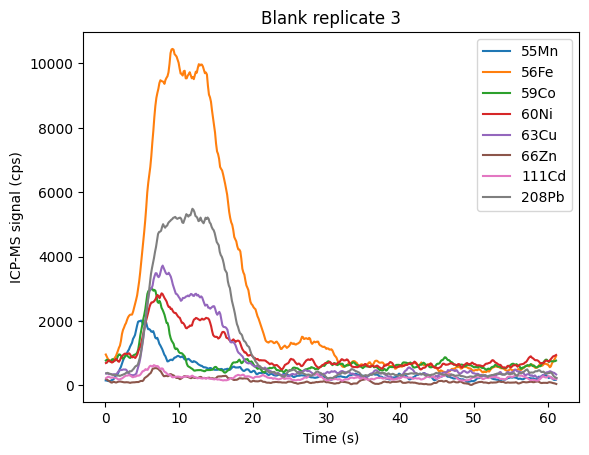

55Mn 28207.76269967693 568.9971301963033 2.0171650486935646
56Fe 155168.00947213348 2725.2311195397465 1.7563099048642297
59Co 48876.333948299754 2045.2142055098266 4.184467287733173
60Ni 60409.36489205455 694.0954165579953 1.1489864490353008
63Cu 54617.70894231324 1458.8766003448084 2.6710688320626215
66Zn 8439.181804989259 262.22392956540875 3.1072198185182063
111Cd 15708.106860642816 649.6677827074286 4.1358757517444245
208Pb 78165.18019806397 1635.954024948425 2.0929447367780076


In [221]:
metals = ['55Mn', '56Fe', '59Co','60Ni','63Cu','66Zn','111Cd', '208Pb']


blanks = {me:{'areas':[],'mean': None,'std':None} for me in metals}

r = 0

for f in flist:

    if 'nitric' in f:
        r = r + 1 
        fig, ax = plt.subplots()
        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            #df = df[df[t]>60*0.66]
            area = getPeakArea(df)

            blanks[metal]['areas'].append(area)

            ax.plot(df[t],df[metal],label = metal)
#plt.ylim(0,6e6)
        ax.set_ylabel('ICP-MS signal (cps)')
        ax.set_xlabel('Time (s)')
        plt.legend()
        plt.title('Blank replicate %s' %r)
        plt.show()

for me in metals:

    blanks[me]['mean'] = np.mean(blanks[me]['areas'])
    blanks[me]['std'] = np.std(blanks[me]['areas'])

for me in metals:

    print(me, blanks[me]['mean'], blanks[me]['std'],  blanks[me]['std'] /  blanks[me]['mean'] * 100 )


In [271]:
metals = ['55Mn', '56Fe', '59Co','60Ni','63Cu','66Zn','111Cd', '208Pb']
mwl = [55,56,59,60,63,66,111,208]
cl = ['C0', 'C1','C2','C3','C4','C5','C6','C7']
cols = {me:c for me, c in zip(metals,cl)}


mws = {me:mw for me, mw in zip(metals,mwl)}
samples = {me:{'areas':[],'mean': None,'std':None} for me in metals}



#for f in flist:
for metal in metals:
  #  fig, ax = plt.subplots()

    for f in flist:
    
    #for metal in metals:

        if '25ppb' in f:
    
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            #df = df[df[t]>60*0.66]
            area = getPeakArea(df)

            samples[metal]['areas'].append(area)

  #         ax.plot(df[t],df[metal],color=cols[metal], label = metal,linewidth = 0.75)

  #          for f in flist:

  #              if 'nitric' in f:
                   # r = r + 1 

  #                      dfb = pd.read_csv(f,sep=';',header=1)
  #                      t = 'Time ' + metal
  #                      dfb = dfb[[t,metal]]
                        #df = df[df[t]>60*0.66]

  #                      ax.plot(dfb[t],dfb[metal],color=cols[metal],linestyle = '--')
  #                      ax.ticklabel_format(axis='y', style='sci')
            #plt.ylim(0,6e6)
  #  h, l = ax.get_legend_handles_labels()
    
  #  ax.set_ylabel('ICP-MS signal (cps)')
  #  ax.set_xlabel('Time (s)')
  #  plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])
  #  plt.title(metal)
  #  plt.show()

        
    
            
    #plt.legend(h[:8],l[:8])

for me in metals:

    samples[me]['mean'] = np.mean(samples[me]['areas'])
    samples[me]['std'] = np.std(samples[me]['areas'])

for me in metals:
    print('%s\tmean sample area: %.2f\tblank-subtracted area: %.2f\tstandard deviation of sample area: %.2f\tLOD (nM): %.3f' %(me, samples[me]['mean'], samples[me]['mean'] - blanks[me]['mean'], samples[me]['std'],samples[me]['std']*2.571/(samples[me]['mean'] - blanks[me]['mean'])*1000/mws[me]))
   # print(me, samples[me]['mean'], samples[me]['mean'] - blanks[me]['mean'], samples[me]['std'])
    print(me,samples[me]['std']*2.571/(samples[me]['mean'] - blanks[me]['mean'])*1000/mws[me])

55Mn	mean sample area: 416567.50	blank-subtracted area: 388359.74	standard deviation of sample area: 7825.75	LOD (nM): 0.942
55Mn 0.9419570024200145
56Fe	mean sample area: 1198147.04	blank-subtracted area: 1042979.03	standard deviation of sample area: 38122.28	LOD (nM): 1.678
56Fe 1.6780980178175613
59Co	mean sample area: 2110393.33	blank-subtracted area: 2061516.99	standard deviation of sample area: 44316.76	LOD (nM): 0.937
59Co 0.9367660196505094
60Ni	mean sample area: 775095.79	blank-subtracted area: 714686.42	standard deviation of sample area: 17115.20	LOD (nM): 1.026
60Ni 1.026165369664224
63Cu	mean sample area: 2309770.95	blank-subtracted area: 2255153.24	standard deviation of sample area: 39824.96	LOD (nM): 0.721
63Cu 0.7206773117824613
66Zn	mean sample area: 279095.44	blank-subtracted area: 270656.25	standard deviation of sample area: 7121.62	LOD (nM): 1.025
66Zn 1.0249888282592927
111Cd	mean sample area: 551340.97	blank-subtracted area: 535632.86	standard deviation of sample a

55
56
59
60
63
66
111
208


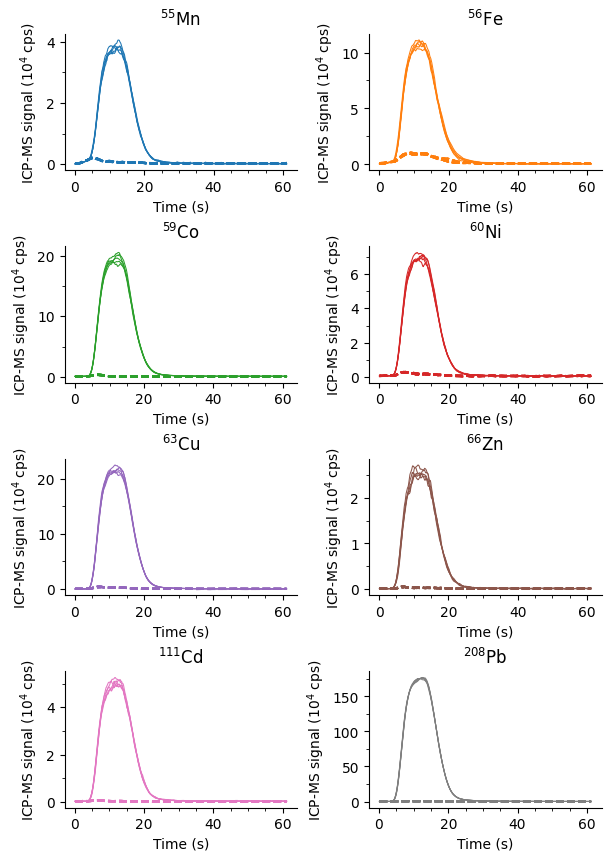

In [351]:
### LOD FIGURE (FIGURE S4)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(6., 8.5),  layout="constrained")

#for f in flist:
row = 0
col = 0

for metal in metals:
    for f in flist:
    
    #for metal in metals:

        if '25ppb' in f:
            ax = axs[row,col]
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]

            ax.plot(df[t],df[metal]/1e4,color=cols[metal], label = metal,linewidth = 0.75)

            for f in flist:

                if 'nitric' in f:
                   # r = r + 1 

                        dfb = pd.read_csv(f,sep=';',header=1)
                        t = 'Time ' + metal
                        dfb = dfb[[t,metal]]
                        #df = df[df[t]>60*0.66]

                        ax.plot(dfb[t],dfb[metal]/1e4,color=cols[metal],linestyle = '--')
                        #ax.ticklabel_format(axis='y', style='sci')
            #plt.ylim(0,6e6)


    h, l = ax.get_legend_handles_labels()

    if col == 1:
        row = row + 1 

    if col == 0:
        col = 1
    else:
        col = 0 

    #samples[me]['std'] = np.std(samples[me]['areas'])
    
    #ax.text(0.95, 0.95, 'mean standard area (counts): %.2e' %(samples[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    #ax.text(0.95, 0.90, 'mean blank area (counts): %.2e' %(blanks[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)

    ax.set_ylabel('ICP-MS signal ($10^4$ cps)')
    ax.set_xlabel('Time (s)')
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])

    tit = re.split('(\d+)', metal)
    an = tit[1]

    print(an)
    el = tit[2]
    strtit = '$^{%s}$%s' %(an,el)
    ax.set_title(strtit)
    sns.despine()
plt.show()


,55Mn,56Fe,59Co,60Ni,63Cu,66Zn,111Cd,208Pb,ppb
0,308.067472,10563.676168,406.404556,1414.945360,2071.898462,501.964960,836.472665,5.231208e+03,0
1,7012.627603,21941.181606,37004.840676,13302.098345,40715.110116,5164.658505,9559.314819,2.551761e+05,25
2,14156.694090,34236.216039,75771.437449,26506.354579,82685.193782,10076.675785,19059.651230,5.536143e+05,50
3,26662.128867,57575.842465,144665.602131,49093.968594,156698.747249,18933.759933,35976.745162,1.006282e+06,100
4,50571.199150,102480.800744,276031.253674,92029.011902,295154.349599,35383.967094,67944.829653,1.882320e+06,200


50571
5.047343171999402 2.2466292911825487
55
102480
1.0011867997004535 1.0005932238929331
56
276031
4.458362372732705 2.111483453104169
59
92029
5.948402040519578 2.438934611776129
60
295154
5.817004969689963 2.4118467964798183
63
35383
5.777551216081228 2.4036537221657426
66
67944
4.353180408124041 2.0864276666407684
111
1882320
12.397719505246624 3.521039548946678
208


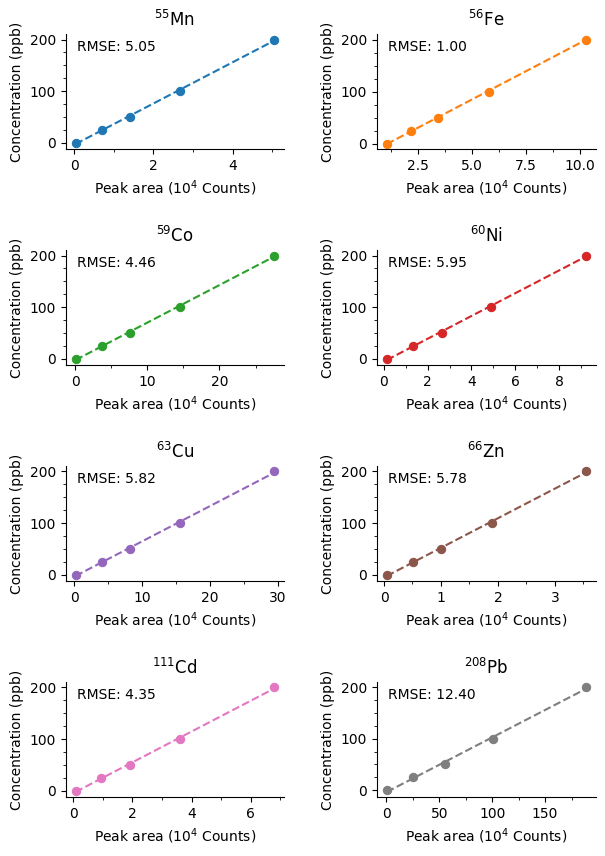

In [352]:
## CAL CURVE FIGURE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

calfile = '/Users/christiandewey/Library/CloudStorage/GoogleDrive-christian.w.dewey@gmail.com/Other computers/My MacBook Pro/manuscripts/in-progress/LC-ICPMS/data/python/column-test/c18/std-c18-phenyl/calibration_areas.txt'

df = pd.read_csv(calfile)
df['ppb']=[0,25,50,100,200]

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(6., 8.5)) #,  layout="constrained")

#for f in flist:
row = 0
col = 0

for metal in metals:
    ax = axs[row,col]
    print(int(max(df[metal])))
    ax.scatter(df[metal]/1e4,df['ppb'],color=cols[metal], label = metal,linewidth = 0.75)

    h, l = ax.get_legend_handles_labels()

    X = np.array([df[metal]]).reshape((-1, 1))
    y = np.array(df['ppb'])
    
    model = LinearRegression().fit(X, y)

    Xpred = np.array(range(0,int(max(df[metal])))).reshape(-1,1)
    ypred = model.predict(X)
    rmse = mean_squared_error(y, ypred)
    print(rmse, np.sqrt(rmse))
    Xpred = X
    ax.plot(Xpred/1e4,ypred,color=cols[metal], linestyle = '--')

    ax.text( 0.05, 0.95, 'RMSE: %.2f' %(rmse),horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    
    if col == 1:
        row = row + 1 

    if col == 0:
        col = 1
    else:
        col = 0 

    #samples[me]['std'] = np.std(samples[me]['areas'])
    
    #ax.text(0.95, 0.95, 'mean standard area (counts): %.2e' %(samples[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    #ax.text(0.95, 0.90, 'mean blank area (counts): %.2e' %(blanks[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)

    ax.set_ylabel('Concentration (ppb)')
    ax.set_xlabel('Peak area ($10^4$ Counts)')
    ax.yaxis.set_minor_locator(MultipleLocator(25))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])
    
    tit = re.split('(\d+)', metal)
    an = tit[1]

    print(an)
    el = tit[2]
    strtit = '$^{%s}$%s' %(an,el)
    ax.set_title(strtit)
    sns.despine()

plt.tight_layout(pad=0.5, w_pad=2.5, h_pad=2)
plt.show()

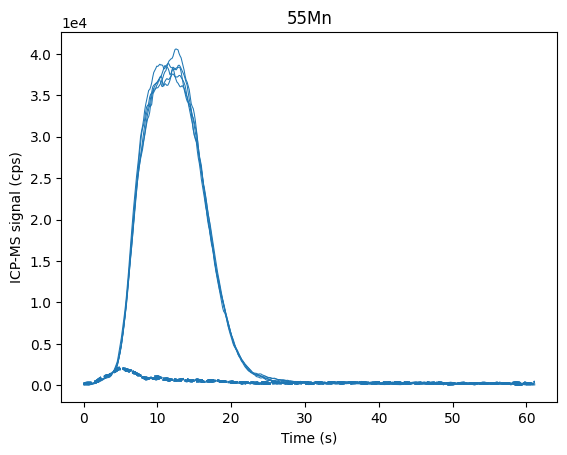

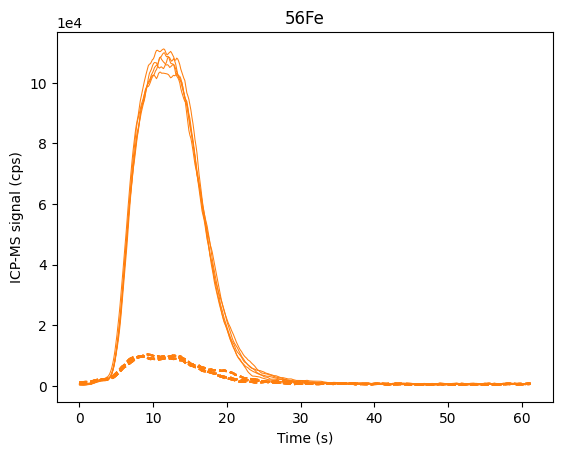

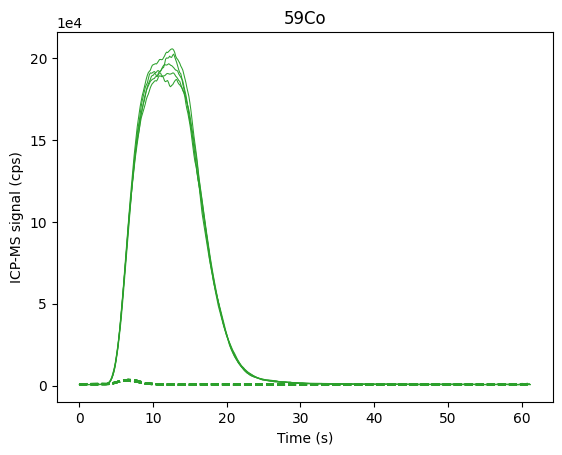

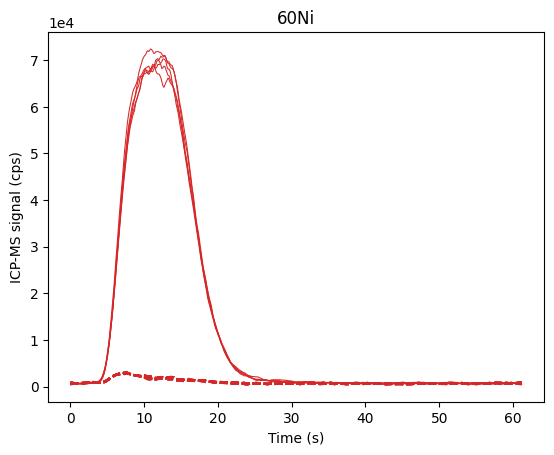

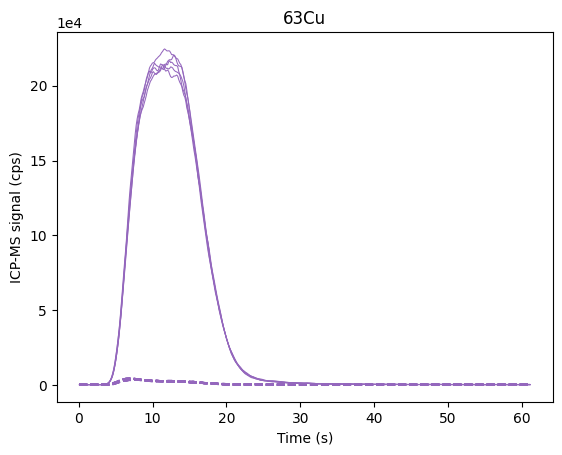

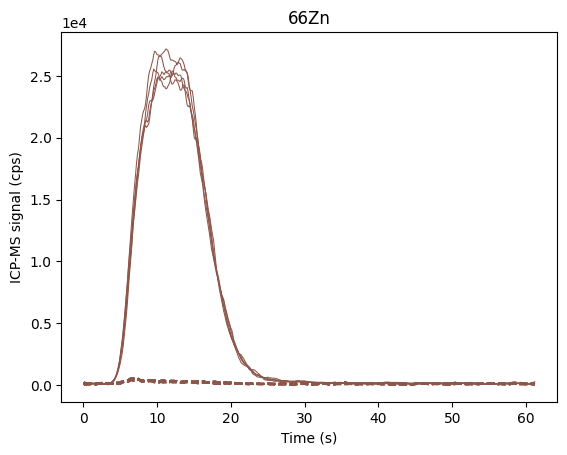

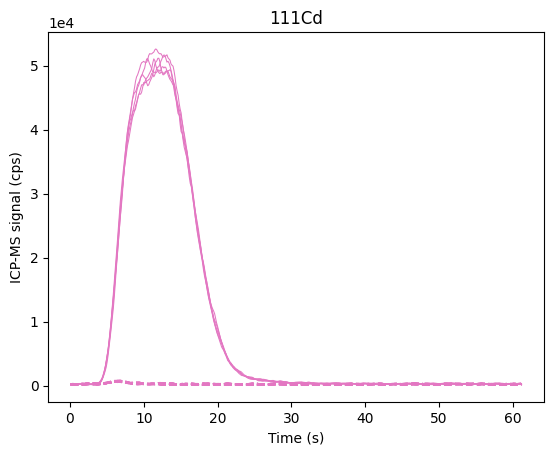

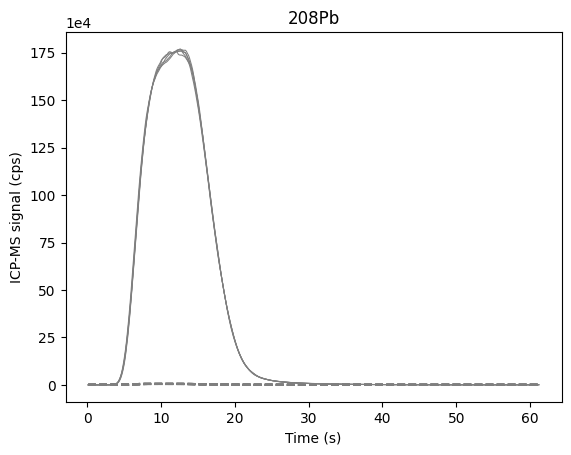

In [272]:
#for f in flist:


for metal in metals:
    fig, ax = plt.subplots()

    for f in flist:
    
    #for metal in metals:

        if '25ppb' in f:
    
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]

            ax.plot(df[t],df[metal],color=cols[metal], label = metal,linewidth = 0.75)

            for f in flist:

                if 'nitric' in f:
                   # r = r + 1 

                        dfb = pd.read_csv(f,sep=';',header=1)
                        t = 'Time ' + metal
                        dfb = dfb[[t,metal]]
                        #df = df[df[t]>60*0.66]

                        ax.plot(dfb[t],dfb[metal],color=cols[metal],linestyle = '--')
                        ax.ticklabel_format(axis='y', style='sci')
            #plt.ylim(0,6e6)
    h, l = ax.get_legend_handles_labels()

    #samples[me]['std'] = np.std(samples[me]['areas'])
    
    #ax.text(0.95, 0.95, 'mean standard area (counts): %.2e' %(samples[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    #ax.text(0.95, 0.90, 'mean blank area (counts): %.2e' %(blanks[metal]['mean']) , horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)

    ax.set_ylabel('ICP-MS signal (cps)')
    ax.set_xlabel('Time (s)')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    #plt.legend(h[:1],l[:1])
    plt.title(metal)
    plt.show()


In [ ]:

fig, ax = plt.subplots()

for f in flist:
    
    if '50ppb' in f:
    
        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            df = df[df[t]>45]
            area = getPeakArea(df)

            ax.plot(df[t],df[metal])
plt.title('50ppb')
###plt.ylim(0,6e6)
plt.show()




fig, ax = plt.subplots()

for f in flist:
    
    if '200ppb' in f:
    
        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            df = df[df[t]>50]
            area = getPeakArea(df)
            if metal == '56Fe':
                ax.plot(df[t],df[metal])
plt.title('200ppb')
#plt.ylim(0,6e6)
plt.show()

In [97]:
factors = {f:None for f in flist if '.csv' in f}

for f in flist:
    
    if '.csv' in f:

        metal = '115In'
        
        df = pd.read_csv(f,sep=';',header=1)

        t = 'Time ' + metal
        df = df[[t,metal]]
        area = getPeakArea(df)
        factors[f] = area / 16000

factors

{'cwd_220505_18_zdv_100ppb_50uL.csv': 1.0006041284057785,
 'cwd_220505_19_zdv_100ppb_50uL.csv': 0.990849867549426,
 'cwd_220505_13_zdv_50ppb_50uL.csv': 0.9672289086430808,
 'cwd_220505_10_zdv_25ppb_50uL.csv': 0.9578063414177349,
 'cwd_220505_9_zdv_25ppb_50uL.csv': 0.9418681640245199,
 'cwd_220505_15_zdv_50ppb_50uL.csv': 0.9839258825110051,
 'cwd_220505_17_zdv_100ppb_50uL.csv': 1.0050414533412442,
 'cwd_220505_16_zdv_50ppb_50uL.csv': 1.0076178766086958,
 'cwd_220505_7_zdv_25ppb_50uL.csv': 0.9488193114010864,
 'cwd_220505_22_zdv_200ppb_50uL.csv': 0.9894042786130586,
 'cwd_220505_23_zdv_200ppb_50uL.csv': 0.9997080924265384,
 'cwd_220505_25_zdv_200ppb_50uL.csv': 1.008531782380709,
 'cwd_220505_24_zdv_200ppb_50uL.csv': 1.002774906424578,
 'cwd_220505_14_zdv_50ppb_50uL.csv': 0.984531169017464,
 'cwd_220505_8_zdv_25ppb_50uL.csv': 0.9476540875923463,
 'cwd_220505_20_zdv_100ppb_50uL.csv': 0.9895615348410587,
 'cwd_220505_21_zdv_100ppb_50uL.csv': 0.9833120677106378,
 'cwd_220505_26_zdv_200ppb_50

In [109]:
stats = {metal:{'av': None,'std': None,'rmse': None,'counts': [],'cps': [],'files': []} for metal in metals}

for f in flist:
    
    if '.csv' in f:

        cf = factors[f]

        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            area = getPeakArea(df) / cf

            stats[metal]['counts'].append(area)
            stats[metal]['cps'].append(area/30)
            stats[metal]['files'].append(f)

for me in metals:

    stats[me]['std'] = np.std(stats[me]['counts'])
    stats[me]['av'] = np.mean(stats[me]['counts'])

stats

{'55Mn': {'av': 96.8897024916294,
  'std': 17.793249138147242,
  'rmse': None,
  'counts': [92.18549491869453,
   72.63986661946568,
   107.0835991275286,
   104.14111661956808,
   109.60178228506557,
   84.05375887500888,
   77.9119390917721,
   86.0418071608023,
   143.8034040547654,
   101.81500998864111,
   100.8010333555882,
   103.00653966722854,
   101.35253755346855,
   90.0256389230336,
   124.82219261558524,
   71.65688281000445,
   66.75214328356816,
   106.16727648522492,
   95.39380435876097,
   98.53822203881322],
  'cps': [3.072849830623151,
   2.4213288873155228,
   3.5694533042509535,
   3.4713705539856026,
   3.653392742835519,
   2.801791962500296,
   2.5970646363924033,
   2.86806023869341,
   4.793446801825513,
   3.393833666288037,
   3.3600344451862734,
   3.4335513222409513,
   3.378417918448952,
   3.0008546307677864,
   4.160739753852841,
   2.3885627603334814,
   2.2250714427856053,
   3.5389092161741638,
   3.1797934786253657,
   3.284607401293774],
  'files

In [90]:
metals = ['55Mn', '59Co','60Ni','66Zn','111Cd','208Pb','63Cu', '56Fe', '115In']

c25ppb = {metal:[] for metal in metals}
c50ppb = {metal:[] for metal in metals}
c100ppb = {metal:[] for metal in metals}
c200ppb = {metal:[] for metal in metals}

for f in flist:
    
    if '.csv' in f:

        cf = factors[f]

        for metal in metals:
        
            df = pd.read_csv(f,sep=';',header=1)
            t = 'Time ' + metal
            df = df[[t,metal]]
            area = getPeakArea(df) / cf

            if '50ppb' in f:
                c50ppb[metal].append(area)
            
            elif '25ppb' in f:
                c25ppb[metal].append(area)


            elif '200ppb' in f:
                c100ppb[metal].append(area)  #'200ppb' files are mislableled

In [91]:

for me in metals:
    print('\n',me)
    #print(c25ppb[me])
    print(c50ppb[me])
    print(c100ppb[me])

    for i,j in zip(c200ppb[me], c50ppb[me]):
        print(i / j)



 55Mn
[11054.863840110993, 10864.358263157777, 10712.13015170448, 10957.812251888552, 10991.696003814643]
[21510.802868475414, 20665.07329253897, 21043.85837159078, 21082.04820400522, 21167.24557398086]

 59Co
[57322.266131552125, 56451.333448561294, 56305.14643516855, 57050.75676542086, 57355.63888544782]
[134790.35675008007, 132348.22682769815, 132944.81531305262, 133593.46522410857, 134601.54994453205]

 60Ni
[19915.02766583673, 19481.187658681796, 19403.378870231132, 19715.361868813554, 19773.719107964862]
[46147.49205882085, 45422.12492678869, 45312.23341426657, 45599.19206494442, 46079.8973188753]

 66Zn
[7234.774151676102, 7034.4887471025, 7101.88821674147, 7278.311850911115, 7345.861259481905]
[17197.064595927517, 16381.654450348937, 16688.15163488462, 17103.51362030457, 17036.47078712222]

 111Cd
[15600.385166664466, 15151.687036415467, 15092.507014261819, 15555.052392930844, 15566.315360520017]
[30230.223170555626, 29350.13663435044, 29516.54494951268, 29740.167806412523, 29

           55Mn         59Co        60Ni        66Zn       111Cd        208Pb  \
25   105.846462   552.813245  215.979845  101.022963   98.802147  1793.312855   
50   133.220636   490.854196  211.446618   128.09471  248.915448   5063.88722   
100  302.375803  1048.903518  381.303064  339.159287  331.691209  5778.442395   

            63Cu        56Fe 115In  
25    441.585857  606.965183   0.0  
50    780.294522  396.264122   0.0  
100  1386.234659  888.171185   0.0  


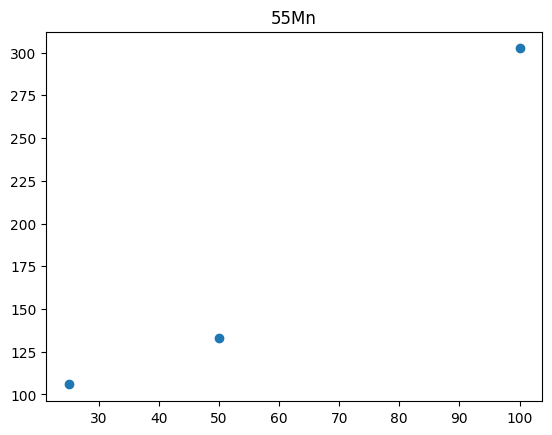

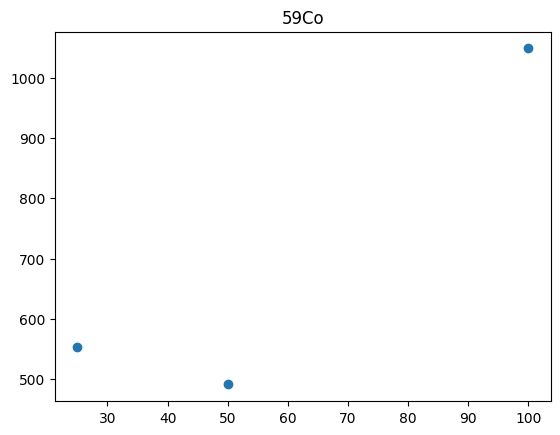

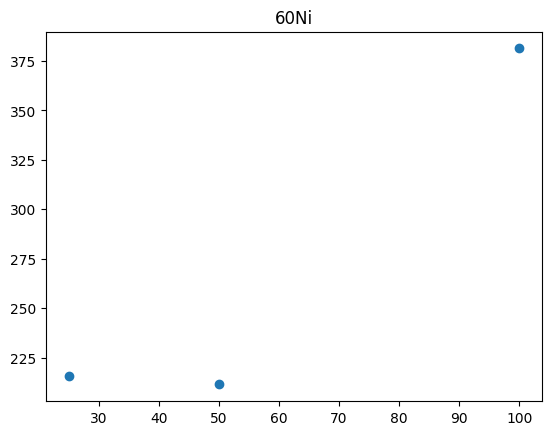

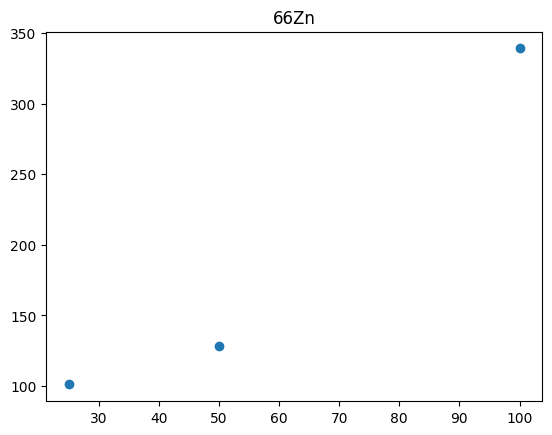

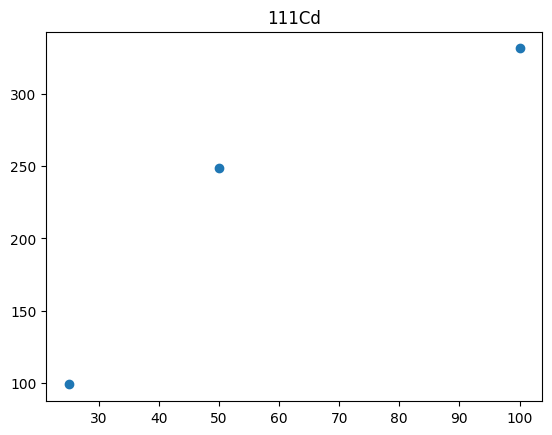

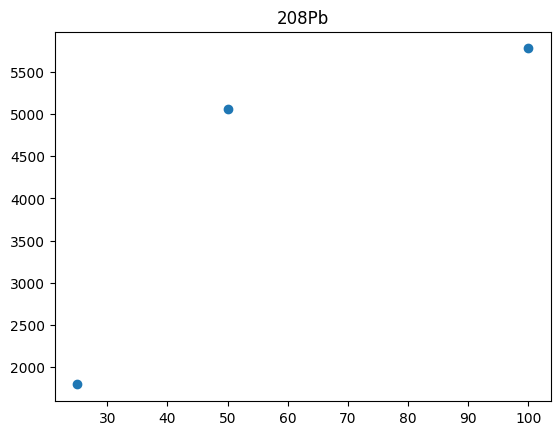

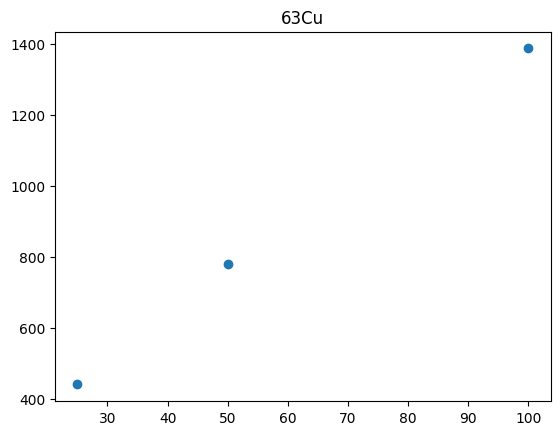

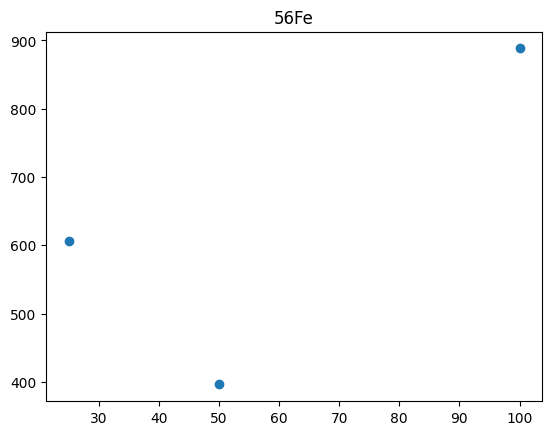

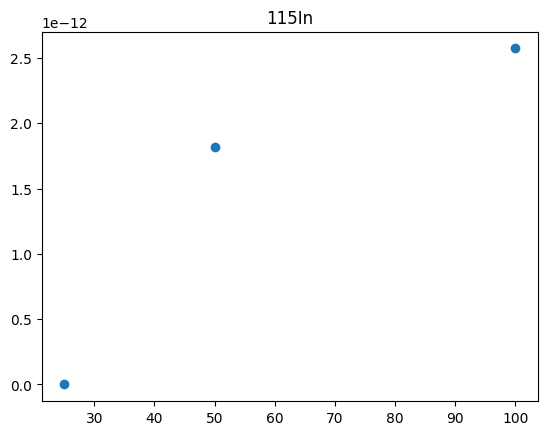

In [94]:
holder = pd.DataFrame(index=[25, 50, 100], columns = metals)

for c, d in zip([25, 50, 100],[c25ppb,c50ppb,c100ppb]):
    pddf = pd.DataFrame(d)
    holder.loc[c] = pddf.std()

print(holder)


for me in metals:
    fig, ax = plt.subplots()

    ax.scatter(holder.index, holder[me])
    plt.title(me)
    plt.show()

In [ ]:

#icpms_file = '/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/Keck iCAP Q/2022/2022-09/Tillamook, Sept 2022/spring_ENV.csv'

icpms = pd.read_csv(icpms_file, sep=';',header=1)

print(icpms.columns)

metals = ['55Mn', '59Co','60Ni','66Zn','111Cd','208Pb','63Cu', '56Fe']

#pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec13.pdf')

fig, ax = plt.subplots()
for me in metals:
    me_key = 'Time %s' %me

    x = icpms[me_key]/60
    inds = np.asarray((x>=14) & (x<=16))

    x_sub = x[inds]

    y = icpms[me]
    y_sub = y[inds]
          

    x_sub = np.asarray(x_sub).reshape((-1, 1))


    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_sub, y_sub)

    # Make predictions using the testing set
    pred = regr.predict(x_sub)
    rmse=np.sqrt(mean_squared_error(y_sub, pred))
    # The mean squared error
    print(me)
    print("Root mean squared error: %.2f" % rmse)
    # The coefficient of determination: 1 is perfect prediction
    print("3 X RMSE: %.2f" % (3*rmse))

    #ax.plot(icpms[me_key]/60, icpms[me]/1000, label=me)        
    ax.plot(x_sub, y_sub, label=me) 
    ax.plot(x_sub,pred,color='black')       
    maxicp = max(maxicp,max(icpms[me].values))


ax.set_ylim(0,maxicp*1.1)
ax.set_title('ICP-MS Traces (Spring Sample)')
ax.set_xlabel('Time (min)')
ax.set_ylabel('ICP-MS signal (1000 cps)')
ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
ax.set_xlim(13.5,16.5)
ax.set_ylim(0,0.1e4)
fig.tight_layout()
plt.show()
